## IBI_ANALYSISFORECAST_PHY_005_001 dataset

The 1-day hindcast + 5-day forecast fields of the hourly, daily, hourly3d and 15min datasets are daily
updated at 14.00UTC.

Cada Ciclo de Previsão do IBI produz, no dia D, 6 dias de informação oceânica: 5 dias de previsão (até D+5d)
mais um dia extra de hindcast (voltar até D-1d).

Neste momento dia 5 de Julho este dataset tem dados horários até ao final do dia 8 de Julho


In [8]:
import pandas as pd
import os
from pathlib import Path
import xarray as xr
import netCDF4 as nc
import numpy as np
import cmocean
import matplotlib.pyplot as plt

In [9]:
current_path = os.getcwd()    #get current working directory
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [10]:
forecast_folder = os.path.join(current_path, '../data/CMEMS_forecast_daily_data')
forecast_folder

'/home/luisfigueiredo/JUNO/notebooks/../data/CMEMS_forecast_daily_data'

In [11]:
nc_path = os.path.join(forecast_folder, 'IBI_forecast5days.nc')
#ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [12]:
#Convert netCDF file to a dataframe
forecastIBI = data.to_dataframe()
forecastIBI_df = forecastIBI.reset_index()

In [13]:
forecastIBI_df

,latitude,longitude,time,thetao
0,35.0,-19.0,2022-07-03 12:30:00,20.896999
1,35.0,-19.0,2022-07-03 13:30:00,20.974001
2,35.0,-19.0,2022-07-03 14:30:00,21.048000
3,35.0,-19.0,2022-07-03 15:30:00,21.116001
4,35.0,-19.0,2022-07-03 16:30:00,21.165001
...,...,...,...,...
21876595,45.0,-5.0,2022-07-08 07:30:00,18.704000
21876596,45.0,-5.0,2022-07-08 08:30:00,18.721001
21876597,45.0,-5.0,2022-07-08 09:30:00,18.743999
21876598,45.0,-5.0,2022-07-08 10:30:00,18.776001


In [14]:
forecastIBI_df['time'] = forecastIBI_df['time'].astype(str)

In [15]:
forecastIBI_df = forecastIBI_df[forecastIBI_df['time'].str.endswith('12:30:00')]

In [16]:
forecastIBI_df

,latitude,longitude,time,thetao
0,35.0,-19.0,2022-07-03 12:30:00,20.896999
24,35.0,-19.0,2022-07-04 12:30:00,20.755001
48,35.0,-19.0,2022-07-05 12:30:00,20.850000
72,35.0,-19.0,2022-07-06 12:30:00,21.070000
96,35.0,-19.0,2022-07-07 12:30:00,21.375999
...,...,...,...,...
21876480,45.0,-5.0,2022-07-03 12:30:00,18.419001
21876504,45.0,-5.0,2022-07-04 12:30:00,18.330000
21876528,45.0,-5.0,2022-07-05 12:30:00,18.368000
21876552,45.0,-5.0,2022-07-06 12:30:00,18.581001


In [17]:
forecastIBI_df['time']= pd.to_datetime(forecastIBI_df['time'])

/tmp/ipykernel_100210/92783633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecastIBI_df['time']= pd.to_datetime(forecastIBI_df['time'])


In [18]:
forecastIBI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911525 entries, 0 to 21876576
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   latitude   911525 non-null  float64       
 1   longitude  911525 non-null  float64       
 2   time       911525 non-null  datetime64[ns]
 3   thetao     734070 non-null  float32       
dtypes: datetime64[ns](1), float32(1), float64(2)
memory usage: 31.3 MB


### Plot the SST map for a certain day

In [19]:
#Dataframe with data related to a specific day (in this case 1st of August 2019)
july3 = forecastIBI_df[forecastIBI_df['time'] == '2022-07-03 12:30:00']
july3

,latitude,longitude,time,thetao
0,35.0,-19.000000,2022-07-03 12:30:00,20.896999
120,35.0,-18.972221,2022-07-03 12:30:00,20.782001
240,35.0,-18.944445,2022-07-03 12:30:00,20.699001
360,35.0,-18.916666,2022-07-03 12:30:00,20.643002
480,35.0,-18.888889,2022-07-03 12:30:00,20.608002
...,...,...,...,...
21876000,45.0,-5.111111,2022-07-03 12:30:00,18.427000
21876120,45.0,-5.083333,2022-07-03 12:30:00,18.441000
21876240,45.0,-5.055555,2022-07-03 12:30:00,18.448000
21876360,45.0,-5.027778,2022-07-03 12:30:00,18.440001


In [20]:
# Convert the df to a numpy array with the SST values for the coordinate pair (longitude and latitude)
sst = july3.pivot_table(index='longitude', columns = 'latitude', values='thetao').T.values

In [21]:
sst = np.flipud(sst)

In [22]:
sst.shape

(361, 505)

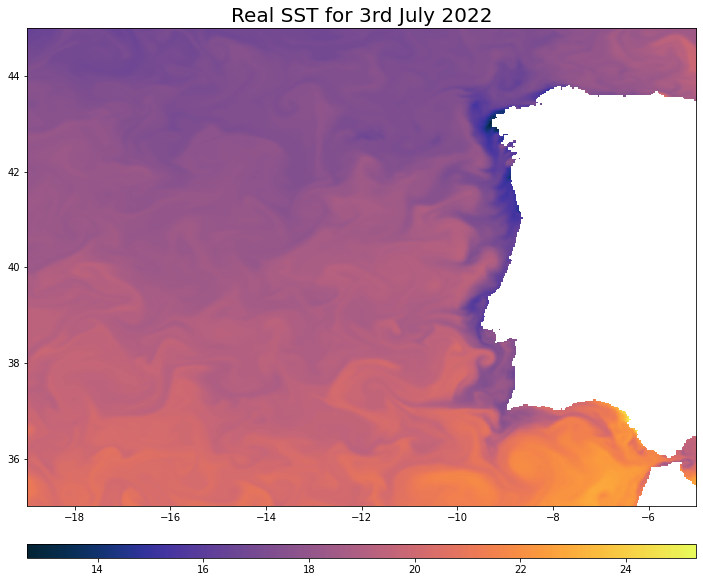

In [44]:
#Plot the array 

lat = july3['latitude'].to_numpy()    #Aug1_mur ->to get the values of latitude and longitude (for MUR data)
lon = july3['longitude'].to_numpy()
lat = np.unique(lat).round(3)
lon = np.unique(lon).round(3)

plt.rcParams["figure.figsize"] = 12, 10
plt.imshow(sst, cmocean.cm.thermal, extent=[lon[0], lon[-1], lat[0], lat[-1]])
plt.colorbar(orientation='horizontal', fraction=0.026, pad=0.07, aspect=50)
plt.title('Real SST for 3rd July 2022', fontsize=20);